<a href="https://colab.research.google.com/github/Harsha77064/Rapidious-Assignment/blob/main/EpiRecepies_AI_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sb



In [ ]:
df=pd.read_csv("epi_r.csv")
df


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.calories.isnull().sum() #count of null values in the calories in column

4117

In [ ]:
#eliminate the rows where calories are more than 10000, as they would be abnormal values.Let us also
#retain the rows with null values for later use.
df=df[(df['calories']<10000) | (df['calories'].isnull() == True)] # use round brackets for conditional filtering

In [ ]:
# Find the mean value of the calories column
cal_mean =df.calories.mean()
cal_mean

487.9006535126304

In [ ]:
df.calories.fillna(cal_mean, inplace=True)

<ipython-input-10-25749c6fa787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.calories.fillna(cal_mean, inplace=True)


In [ ]:
df.calories.describe()

,calories
count,20031.000000
mean,487.900654
std,536.611756
min,0.000000
25%,229.000000
50%,445.000000
75%,502.000000
max,9831.000000


In [ ]:
df

,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.0,7.0,165.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,487.900654,NaN,NaN,NaN
4,Spinach Noodle Casserole,3.125,547.000000,20.0,32.0,452.0
...,...,...,...,...,...,...
20046,Chinese Barbecued Spareribs,3.750,998.000000,55.0,80.0,2027.0
20048,Artichoke and Parmesan Risotto,4.375,671.000000,22.0,28.0,583.0
20049,Turkey Cream Puff Pie,4.375,563.000000,31.0,38.0,652.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.000000,45.0,24.0,517.0


In [ ]:
# prompt: Using dataframe df: remove duplicates

# Remove duplicate rows based on all columns
df = df.drop_duplicates()


In [ ]:
df.shape

(17719, 6)

**Data Analaysis and Visualization**


<ipython-input-12-cda5e0211dc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.rating)


<Axes: xlabel='rating', ylabel='Density'>

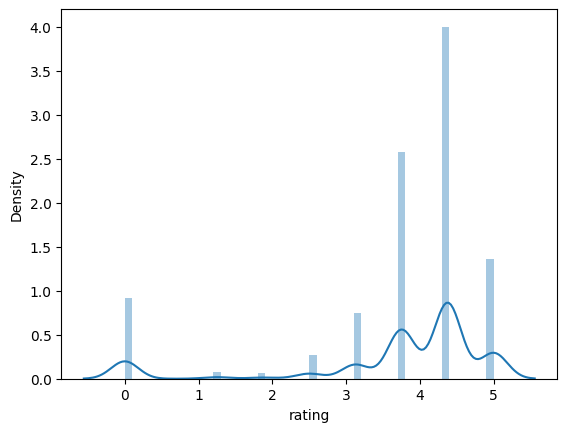

In [ ]:
#Distplot to observe the frequency of different ratings
import seaborn as sb
sb.distplot(df.rating)

Text(0, 0.5, 'Frequency')

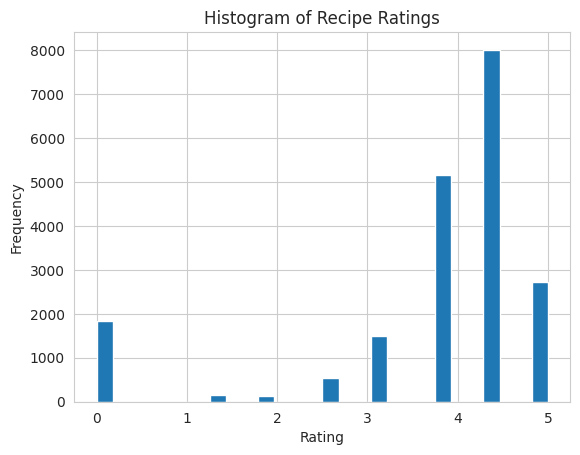

In [ ]:
#Histogram to observe the frequency of different rating
df.rating.hist(bins=28)
plt.title('Histogram of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

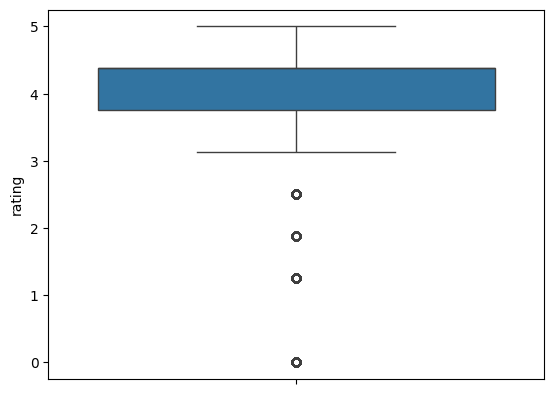

In [ ]:
#Boxplot to observe the most common rating, and the outliers
sb.boxplot(df.rating)
sb.set_style("whitegrid")

In [ ]:
df.rating.isnull().sum()

0

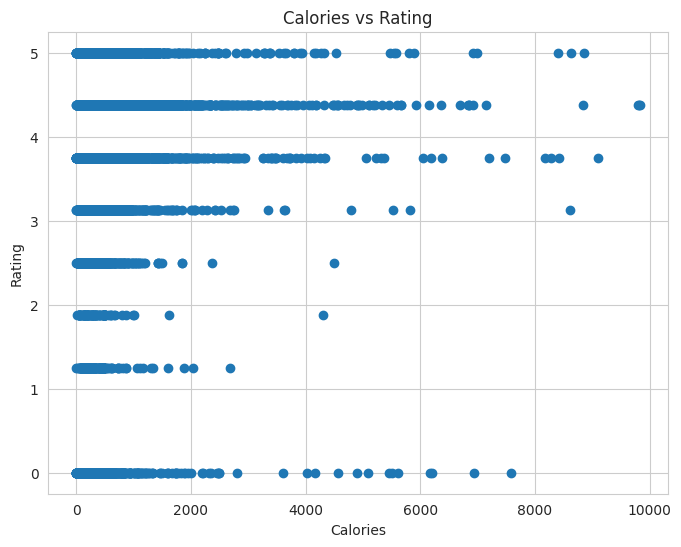

In [ ]:
# Scatter plot to see the relationship between calories and rating
plt.figure(figsize=(8, 6))
plt.scatter(df['calories'], df['rating'])
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.title('Calories vs Rating')
plt.show()

Text(0, 0.5, 'Frequency')

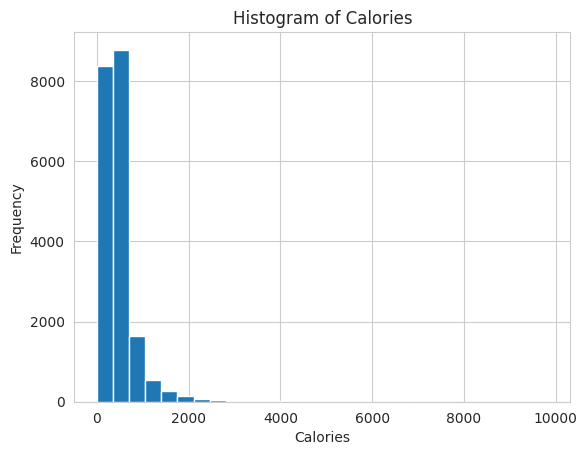

In [ ]:
#Histogram to observe the calories
df.calories.hist(bins=28)
plt.title('Histogram of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

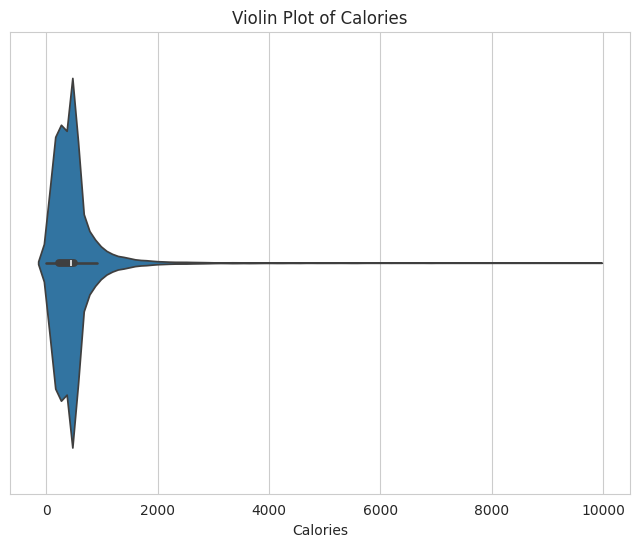

In [ ]:
# Violin plot to observe the distribution of calories
plt.figure(figsize=(8, 6))
sb.violinplot(x=df['calories'])
plt.xlabel('Calories')
plt.title('Violin Plot of Calories')
plt.show()

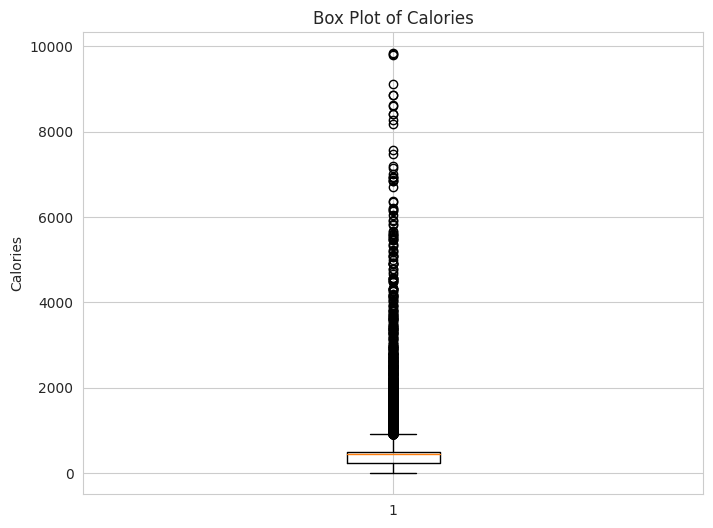

In [ ]:
# Box plot to observe the distribution of calories
plt.figure(figsize=(8, 6))
plt.boxplot(df['calories'])
plt.ylabel('Calories')
plt.title('Box Plot of Calories')
plt.show()


<Axes: ylabel='Density'>

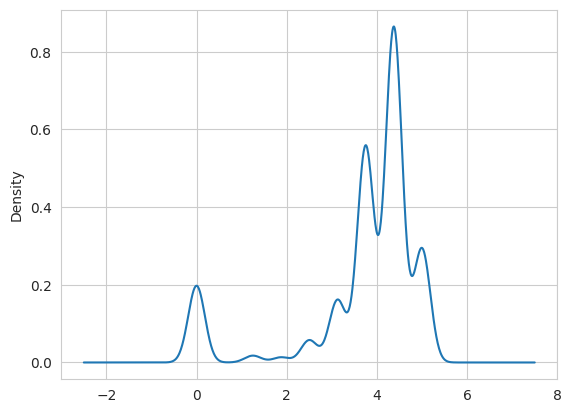

In [ ]:
df['rating'].plot.kde()

<Axes: xlabel='calories', ylabel='rating'>

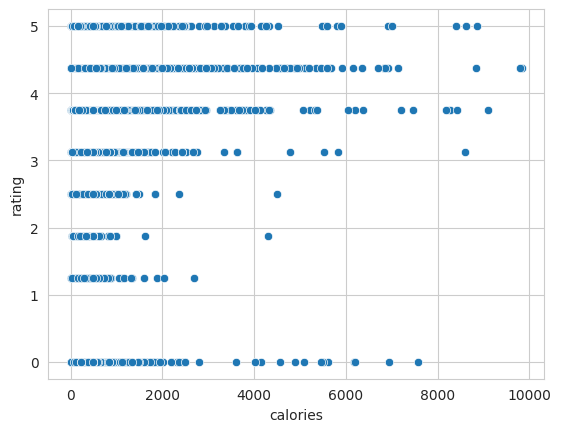

In [ ]:
sb.scatterplot(x='calories', y='rating', data=df)

<Axes: ylabel='calories'>

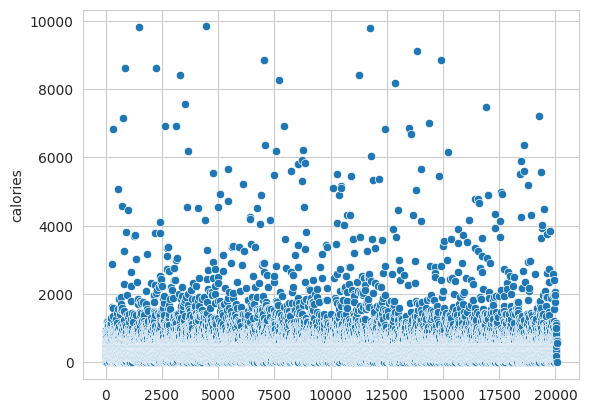

In [ ]:
sb.scatterplot(data=df['calories'])

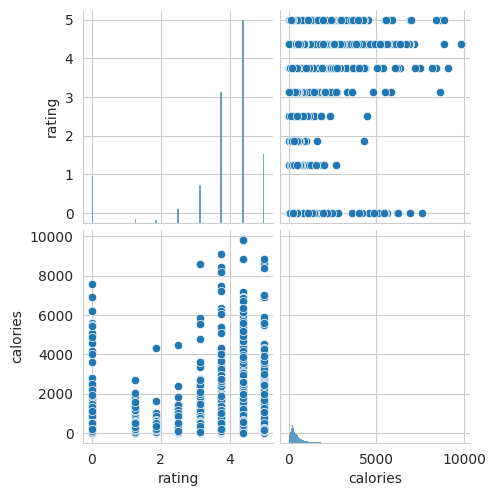

In [ ]:
sb.pairplot(data=df.iloc[:,1:3])

In [ ]:
print(df)

                                             title  rating    calories  \
0                  Lentil, Apple, and Turkey Wrap    2.500  426.000000   
1      Boudin Blanc Terrine with Red Onion Confit    4.375  403.000000   
2                    Potato and Fennel Soup Hodge    3.750  165.000000   
3                 Mahi-Mahi in Tomato Olive Sauce    5.000  487.900654   
4                        Spinach Noodle Casserole    3.125  547.000000   
...                                            ...     ...         ...   
20047                              Parmesan Puffs    3.125   28.000000   
20048              Artichoke and Parmesan Risotto    4.375  671.000000   
20049                       Turkey Cream Puff Pie    4.375  563.000000   
20050     Snapper on Angel Hair with Citrus Cream    4.375  631.000000   
20051  Baked Ham with Marmalade-Horseradish Glaze    4.375  560.000000   

       protein   fat  sodium  #cakeweek  #wasteless  22-minute meals  \
0         30.0   7.0   559.0        0.0

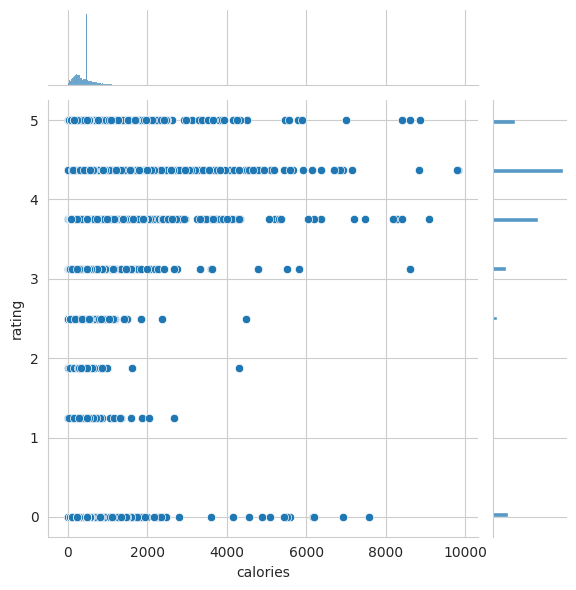

In [ ]:
sb.jointplot(x='calories', y='rating', data=df, kind='scatter')
plt.show()


In [ ]:
df.describe()


,rating,calories,protein,fat,sodium
count,17719.000000,17719.000000,14021.000000,14002.000000,14045.000000
mean,3.723052,502.082685,22.357892,28.897872,731.025489
std,1.320794,546.948583,43.547673,43.618158,3123.892728
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,241.000000,3.000000,8.250000,91.000000
50%,4.375000,467.000000,9.000000,18.000000,309.000000
75%,4.375000,520.000000,29.000000,34.000000,737.000000
max,5.000000,9831.000000,1625.000000,923.000000,132220.000000


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['calories'].plot(kind='hist', bins=20, title='calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['protein'].plot(kind='hist', bins=20, title='protein')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['fat'].plot(kind='hist', bins=20, title='fat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='rating', y='calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='calories', y='protein', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='protein', y='fat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='fat', y='sodium', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['protein'].plot(kind='line', figsize=(8, 4), title='protein')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['fat'].plot(kind='line', figsize=(8, 4), title='fat')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
original_columns = df.columns.tolist()
print("Columns before dropping any:")
print(original_columns)

# Assuming you want to drop 'title' and 'calories' columns as an example
# Replace with the columns you actually want to drop
columns_to_drop = ['title', 'calories']
df_dropped = df.drop(columns=columns_to_drop)

new_columns = df_dropped.columns.tolist()
print("\nColumns after dropping 'title' and 'calories':")
print(new_columns)


Columns before dropping any:
['title', 'rating', 'calories', 'protein', 'fat', 'sodium']

Columns after dropping 'title' and 'calories':
['rating', 'protein', 'fat', 'sodium']


In [ ]:
# prompt: show dropped duplicate values

# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [title, rating, calories, protein, fat, sodium]
Index: []
